## Python Code:
- ##### EWBs Energy consumption prediction model comparison using machine learning

- ##### The machine learning methods analysis are ANN, SVR & ARIMA.

### Introduction 
In this study, a comparative analysis of machine learning models was conducted for the prediction and forecasting of EWBs energy consumption, using a dataset from 67 apartments as a case study. Subsequently, the input data was categorized into five distinct scenarios, serving as inputs to ANN, SVR, and ARIMA models to simulate their prediction and forecasting capabilities, evaluated using performance metrics presented in subsequent sections.

Scenario one will be used throughout this report for implementation, while the other scenarios will remain commented in the code and can be uncommented for estimation as needed. Figure 1 illustrates the implementation of this methodology.

<center>
<figure>
  <img src="method.jpg" width="70%" height="70%">
  <figcaption><i> Figure 1: Comparative analysis methodology </i></figcaption>
</figure>
</center>

#### Libraries for model development 
- All python liberies use for model devemploment and comparison are presented below

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import matplotlib.colors as mcolors
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score
from matplotlib.pyplot import rc
from statsmodels.tsa.stattools import acovf
from statsmodels.graphics.tsaplots import plot_acf
import time


#### Data preprocessing and description
- The data is structured into secanarios
the 67 apartment dataset for 6 months enery consumption of EWB ask case study which is cateories into 5 distinct secanrios as time-steps inputs peresnted in table 1.

| Scenarios | Timestep | Training period | Prediction duration | Forecast length |
| :--: | :--: | :--: | :--: | :--: |
| SC1 | 10 minutes | daily | 24 hours | 2 hours |
| SC2 | 1 hour | daily | 7 days | 24 hours |
| SC3 | 24 hours | winter | 60 days | 30 days |
| SC4 | 24 hours | spring | 60 days | 30 days |
| SC5 | 24 hours | 6 months | 150 days | 30 days |

- Loading data time steps and data structuring for model application and visualisation codes below for secanario 1.
- secanario 1 prediction and forecastin length.
- Adopting the mean of all the apartment as in inputs

In [2]:
# Secanrio data (SC1)
flowload_data = pd.read_csv('eleload.csv')  #  10mins timestamp

# Prediction and forecasting duration parameters
total_time_len_day = 24 * 6   # prediction duration daily consumption  

length_of_predict = 12  # forecasting length daily consumption

# mean of the apartments 
sample_data = flowload_data.iloc[:, -1] # the mean of all the apartments 


#### Data normailiation and training data
- the data was normolization, subsebsequent the data was slipted to 80% trained and 20% test for prediction and forecasting model implementation.

In [3]:
# data normalisation and training 
datainf = flowload_data.iloc[:, -1].values  

datainf = datainf / np.max(datainf) # array

data_pass_to = [None, total_time_len_day, length_of_predict] # prediction and forecastion inputs

actual = datainf[:total_time_len_day + length_of_predict]  # actual data input

## training split of data

split_size = int(0.8 * len(flowload_data))

train_data = datainf[:split_size]
test_data = datainf[split_size:]

#### Data description of secanrio 1
- Scenario 1 (SC1) consists of 10-minute time-step input data representing the daily energy consumption of EWBs across 67 apartments. SC1 will be used for code implementation, while other scenarios will be commented out, as shown below.

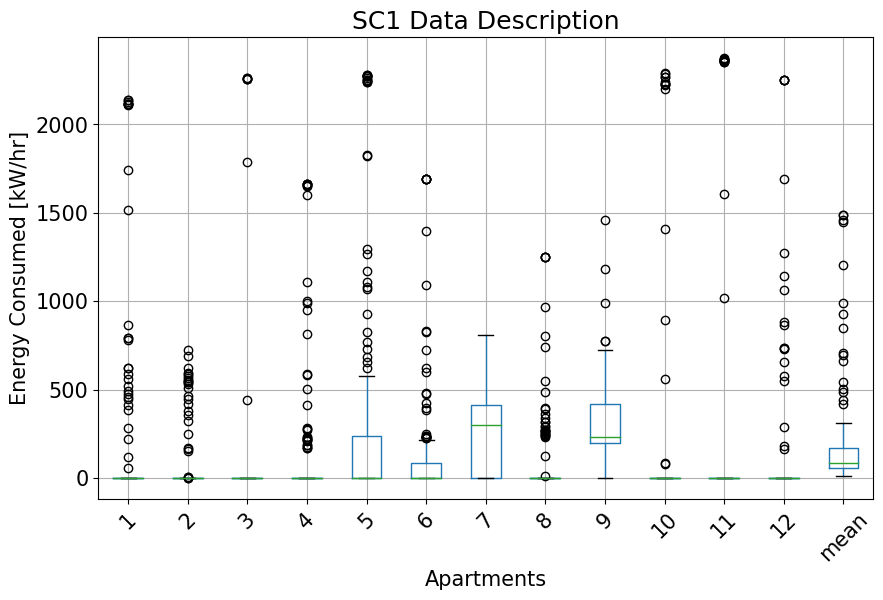

In [5]:

# Set display options (optional for debug)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Load the dataset
df = pd.read_csv("eleload.csv")

# the data input
df_selected = df.iloc[:144].copy()

# Rename columns (ensure number of names matches the number of columns)
df_selected.columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', 'mean']

# Plot settings
rc('font', **{'size': 15})
plt.figure(figsize=(10, 6))
df_selected.boxplot()

plt.title('SC1 Data Description')
plt.xlabel('Apartments')
plt.ylabel('Energy Consumed [kW/hr]')
plt.xticks(rotation=45)
plt.grid(True)

# Save and show plot
plt.savefig('sc1_des.jpg')
plt.show()



#### Data Description of  other 4 secanrios, 
- Scenario 2 (SC2) as represent in figure 2, scenario 3 (SC3) as figure 3, scenario 4 (SC4) as figure 4, and scenario 5 (SC5) as  figure 5 respectively. the figures shoes the data descrpition of the data input time steps and means of the energy consumption for EWBs of 67 apartments. SC1 will be used for codel implememtataion other scenarios will be commented out while, other scenario codes are commented as below.

- Scenario 2 (SC2)

<center>
<figure>
  <img src="sc2_des.jpg" width="70%" height="70%">
  <figcaption><i> Figure 2: Scenario 2 (SC2) data description </i></figcaption>
</figure>
</center>


- Scenario 3 (SC3)

<center>
<figure>
  <img src="sc3_des.jpg" width="70%" height="70%">
  <figcaption><i> Figure 3: Scenario 3 (SC3) data description </i></figcaption>
</figure>
</center>


- Scenario 4 (SC4)

<center>
<figure>
  <img src="sc4_des.jpg" width="70%" height="70%">
  <figcaption><i> Figure 4: Scenario 4 (SC4) data description </i></figcaption>
</figure>
</center>


- Scenario 5 (SC5)

<center>
<figure>
  <img src="sc5_des.jpg" width="70%" height="70%">
  <figcaption><i> Figure 6: Scenario 5 (SC5) data description </i></figcaption>
</figure>
</center>


In [23]:
# Secanrio 2 (SC2) data 
###################  uncomment to run the Secanrio
#flowload_data = pd.read_csv('electric_onehour.csv')  # hourly consumption data of 1houur timestamp

# mean of the apartments as input
#sample_data = flowload_data.iloc[:, -1] # 

#total_time_len_day = 24 * 7   # Number of days of prediction hourly

#length_of_predict = 24  # Number of future prediction (hour) /onehour 

In [24]:
# Secanrio 3 (SC3) data 
###################  uncomment to run the Secanrio
#flowload_data = pd.read_csv('electric_oneday.csv')  # daily consumption deframe data for 24houurs timestamp

#winter_dates = flowload_data.iloc[:90] # winter training duration

# Prediction and forecasting duration parameters
#total_time_len_day = 60   # prediction length

#length_of_predict = 30  # future prediction (forecast) length daily consumption


In [25]:
# Secanrio 4 (SC4) data 
###################  uncomment to run the Secanrio

#flowload_data = pd.read_csv('electric_oneday.csv')  # daily consumption data for 24 hours time-step

#spring_dates = flowload_data.iloc[90:183] # spring dates 

# Prediction duration parameters 
#total_time_len_day = 30 * 2   # prediction spring

#length_of_predict = 30  # future prediction (forecasting) spring

In [26]:
# Secanrio 5 (SC5) data 
###################  uncomment to run the Secanrio

#flowload_data = pd.read_csv('electric_oneday.csv')  # daily consumption deframe data for 24houurs timestamp

#total_time_len_day = 30 * 5   # prediction 

#length_of_predict = 30  # future prediction (forecasting)


#### ARIMA forecasting & prediction model development

The ARIMA model implement was carried out with following parameter obtained from emperical simulation as ARIMA (3, 1, 0) presented in the code below.

In [14]:
#### ARIMA forecast and Prediction model development and analysis 


#Computational time cost 
start_time_arima_p = time.time()
start_time_arima_r = time.time()

# ARIMA Model
def arima_process(data, nhours, predict_len):
  
    kndata = data[:nhours]
    ukndata = data[nhours:nhours + predictlen]

    # Fitting the ARIMA model
    model = ARIMA(kndata, order=(3, 1, 0))
    fitted_model = model.fit()
    
    #prediction
    predict = fitted_model.predict(start=1, end=total_time_len_day)
    # Forecasting
    forecast = fitted_model.forecast(steps=predictlen)
    residuals = fitted_model.resid
    

    return kndata, ukndata, predict, forecast, residuals, fitted_model


nhours = total_time_len_day
predictlen = length_of_predict
kndata, ukndata, predict, forecast, residuals, fitted_model = arima_process(datainf, nhours, predictlen)

print(fitted_model.summary())

# computation time results
end_time_arima_p = time.time()
end_time_arima_r = time.time()
process_time_arima_p = end_time_arima_p - start_time_arima_p
process_time_arima_r = end_time_arima_r - start_time_arima_r
minute_arima_p = process_time_arima_p // 60 
minute_arima_r = process_time_arima_r // 60
second_arima_p = process_time_arima_p % 60 
second_arima_r = process_time_arima_r % 60 

# Computation time visualisation 

print('Time Spent for arima_p: ', round(minute_arima_p), 'minutes', round(second_arima_p,3), 'seconds') # prediction time results

print('Time Spent for arima_r: ', round(minute_arima_r), 'minutes', round(second_arima_r,3), 'seconds') # forecasting time results


# Performance Metrics Evaluation for Prediction

r2_p = r2_score(kndata, predict)
rmse_p = np.sqrt(mean_squared_error(kndata, predict))
arima_mae_p = mean_absolute_error(kndata, predict)
mse_p = mean_squared_error(kndata, predict)


# Performance Metrics Evaluation for forecasting

r2_r = r2_score(ukndata, forecast)
rmse_r = np.sqrt(mean_squared_error(ukndata, forecast))
arima_mae_r = mean_absolute_error(ukndata, forecast)
mse_r = mean_squared_error(ukndata, forecast)


## Print out metrics
print("prediction - R2 Score:", r2_p, "RMSE:", rmse_p, "MAE:", arima_mae_p, "MSE:", mse_p)
print("forecast - R2 Score:", r2_r, "RMSE:", rmse_r,"MAE:", arima_mae_r, "MSE:", mse_r)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  144
Model:                 ARIMA(3, 1, 0)   Log Likelihood                 214.292
Date:                Tue, 25 Mar 2025   AIC                           -420.583
Time:                        17:19:14   BIC                           -408.732
Sample:                             0   HQIC                          -415.767
                                - 144                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2673      0.044      6.044      0.000       0.181       0.354
ar.L2          0.0744      0.060      1.230      0.219      -0.044       0.193
ar.L3          0.0310      0.073      0.422      0.6

#### ANN Model Implementation 
the ANN model is designed with the following  parameters obtained from empericaly simulation:
- Optimzer as ADAM
- Hinden layers are 16, 32, and 64
- Epoch = 200
- Batchsize = 30
- The computataional effficiency was evaluated with the respective performance metrics as present in the code below

Epoch 1/200
688/688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 6.6624e-08 - val_mse: 6.6624e-08
Epoch 2/200
688/688 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.0217e-08 - mse: 2.0217e-08 - val_loss: 2.5882e-08 - val_mse: 2.5882e-08
Epoch 3/200
688/688 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.0718e-08 - mse: 1.0718e-08 - val_loss: 1.0141e-08 - val_mse: 1.0141e-08
Epoch 4/200
688/688 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5.7369e-09 - mse: 5.7369e-09 - val_loss: 6.0818e-09 - val_mse: 6.0818e-09
Epoch 5/200
688/688 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7.2104e-09 - mse: 7.2104e-09 - val_loss: 1.7511e-08 - val_mse: 1.7511e-08
Epoch 6/200
688/688 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.1487e-08 - mse: 3.1487e-08 - val_loss: 1.8514e-07 - val_mse: 1.8514e-07
Epoch 7/200
688/688 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4.0316e-06 - mse: 4.0316e-06 - val_loss: 1.3583e-08 - val_mse: 1.3583e-08
Epoch 8/200
688/688 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.

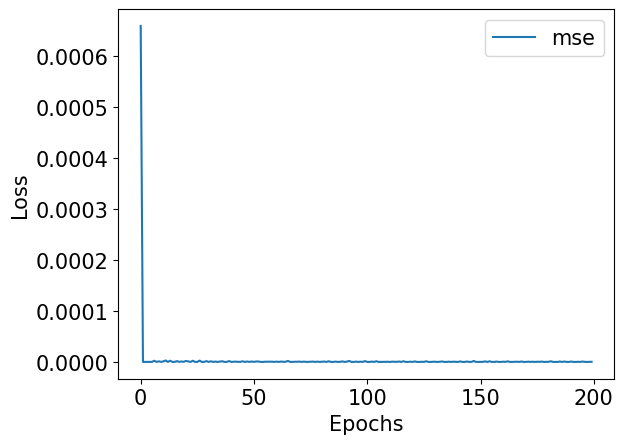

Time Spent for ann_p:  2 minutes 48.774 seconds
Time Spent for ann_r:  2 minutes 48.774 seconds
688/688 ━━━━━━━━━━━━━━━━━━━━ 1s 701us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step
Training Data - R2 Score: 0.9999995083990673 RMSE: 0.00012089108177500644 MAE: 0.00011779209384773717 MSE: 1.4614653652731294e-08
Test Data - R2 Score: 0.9999995136742938 RMSE: 0.0001145987199784399 MAE: 0.00011116837389401814 MSE: 1.313286662069688e-08


In [12]:

#### from slipt above training data



#Computational time cost 
start_time_ann_p = time.time()
start_time_ann_r = time.time()


def ann_model(): 
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(1,)),  
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        #tf.keras.layers.Dense(1, activation='sigmoid') # 
        tf.keras.layers.Dense(1, activation='linear')
    ])
    
    model.compile(optimizer='adam', loss='mse', metrics=['mse']) 
    
    history = model.fit(
        train_data, train_data,  
        epochs=200,  
        validation_data=(test_data, test_data),  # Validation set
        verbose=1
    )
    
    return model, history

    

model, history = ann_model() 

pred = model.predict(datainf)


# learning curve plots
df = pd.DataFrame(history.history)
plt.plot(list(range(len(df.mse))), df.mse, label='mse')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


# Computation time ends
end_time_ann_p = time.time()
end_time_ann_r = time.time()
process_time_ann_p = end_time_ann_p - start_time_ann_p
process_time_ann_r = end_time_ann_r - start_time_ann_r
minute_ann_p = process_time_ann_p // 60 
minute_ann_r = process_time_ann_r // 60
second_ann_p = process_time_ann_p % 60 
second_ann_r = process_time_ann_r % 60 

# print prediction time results
print('Time Spent for ann_p: ', round(minute_ann_p), 'minutes', round(second_ann_p,3), 'seconds')

# print forecasting time results
print('Time Spent for ann_r: ', round(minute_ann_r), 'minutes', round(second_ann_r,3), 'seconds')

# Performance Metrics Evaluation for Prediction
train_predictions = model.predict(train_data).flatten()
test_predictions = model.predict(test_data).flatten()

#  prediction metrics 
r2_train = r2_score(train_data, train_predictions)
rmse_train = np.sqrt(mean_squared_error(train_data, train_predictions))
ann_mae_train = mean_absolute_error(train_data, train_predictions)
mse_train = mean_squared_error(train_data, train_predictions)

# forecasting metrics 
r2_test = r2_score(test_data, test_predictions)
rmse_test = np.sqrt(mean_squared_error(test_data, test_predictions))
ann_mae_test = mean_absolute_error(test_data, test_predictions)
mse_test = mean_squared_error(test_data, test_predictions)


# Print prediction and forecasting results
print("Training Data - R2 Score:", r2_train, "RMSE:", rmse_train, "MAE:", ann_mae_train, "MSE:", mse_train)
print("Test Data - R2 Score:", r2_test, "RMSE:", rmse_test,"MAE:", ann_mae_test, "MSE:", mse_test)



#### SVR Model implementation 

The SVR prediction and forecastiong model developemnt was base on the following parameters from emperical simulation
- Kernel use is RBE
- Error - control = 0.2 
- Normal 1 = 100
- iterative control = 0
- maxiter = 1000
- epsillion = 0.1
- sigma = 0.005
The computational cost & performance metrix are evaluated subsequently as presented in the code below.

In [15]:
##################SVR MODEL DEVELOPMENT##################

## Computational time cost
start_time_svr_p = time.time()
start_time_svr_r = time.time()

### Kernel function of SVR development

def funck(x, y, kernel_type):
    # Gaussian Kernel
    if kernel_type == 'g':
        sigma = 0.0005  # value subject to adjustment 
        return np.exp(-np.linalg.norm(x - y) ** 2 / (2 * (sigma ** 2)))
    return 0

#### SVR model function 
def svr_process(datainf, data_pass_to, past_predict_len):
    nhour1 = data_pass_to[1]
    predictlen = data_pass_to[2]
    data = datainf
    datain = []

    for kl in range(nhour1 + predictlen):
        datain.append(data[kl:kl + 2])

    datain = np.array(datain) 
    
    datax = datain[:, :-1]
    datay = datain[:, -1]
    totlpt = len(datain)
    alpha = np.zeros(totlpt)
    norm1 = 10e2
    errortol = 0.2
    itercnt = 0
    maxiter = 10e2
    eps = 0.1

    while norm1 > errortol and itercnt < maxiter:
        alpha_old = alpha.copy()
        alpha_ = alpha.copy()

        for indxd in range(totlpt):
            gx = np.array([funck(datax[x], datax[indxd], 'g') for x in range(len(datax))])
            alpha[indxd] = alpha[indxd] + datay[indxd] - eps * np.sign(alpha[indxd]) - np.dot(alpha, gx)

            if alpha_[indxd] * alpha[indxd] < 0:
                alpha[indxd] = 0

        norm1 = np.linalg.norm(alpha_old - alpha)
        itercnt += 1

  

    outdata = np.array([alpha[indx2] * np.array([funck(datax[x], datax[indx2], 'g') for x in range(len(datax))]) for indx2 in range(totlpt)])
    outdataf = np.sum(outdata, axis=0)

    # Handling the outdataf for non-array cases
    if not isinstance(outdataf, np.ndarray):
        outdataf = np.array([outdataf])

    # predictions outcomes
    past_predictions = outdataf[past_predict_len:nhour1] if past_predict_len < nhour1 else np.array([])
    

    # Future predictions (forecast) outcome
    resout = outdataf[nhour1:nhour1 + predictlen] if len(outdataf) > nhour1 else np.array([])

    kndata = datay[:nhour1]
    ukndata = datay[nhour1:nhour1 + predictlen]
    SVR_MSE = np.mean((ukndata - resout) ** 2) if resout.size > 0 else np.nan
    

    return kndata, ukndata, past_predictions, resout, SVR_MSE


# prediction parameters
past_predict_len = 0  # Number of hours in the past for which predictions are made as a loop

kndata, ukndata, past_predictions, resout, svr_mse = svr_process(datainf, data_pass_to, past_predict_len)

#Computational cost end time
end_time_svr_p = time.time()
end_time_svr_r = time.time()
process_time_svr_p = end_time_svr_p - start_time_svr_p
process_time_svr_r = end_time_svr_r - start_time_svr_r
minute_svr_p = process_time_svr_p // 60 
minute_svr_r = process_time_svr_r // 60
second_svr_p = process_time_svr_p % 60 
second_svr_r = process_time_svr_r % 60 


# print prediction time.
print('Time Spent for svr_p: ', round(minute_svr_p), 'minutes', round(second_svr_p,3), 'seconds')

# print forecasting time.
print('Time Spent for svr_r: ', round(minute_svr_r), 'minutes', round(second_svr_r,3), 'seconds')


# Performance Metrics Evaluation for Prediction
r2_p = r2_score(kndata, past_predictions)
rmse_p = np.sqrt(mean_squared_error(kndata, past_predictions))
svr_mae_p = mean_absolute_error(kndata, past_predictions)
mse_p = mean_squared_error(kndata, past_predictions)

# Performance Metrics Evaluation for forecasting.
r2_r = r2_score(ukndata, resout)
rmse_r = np.sqrt(mean_squared_error(ukndata, resout))
svr_mae_r = mean_absolute_error(ukndata, resout)
mse_r = mean_squared_error(ukndata, resout)


# Print out Prediction metrics
print("prediction - R2 Score:", r2_p, "RMSE:", rmse_p, "MAE:", svr_mae_p, "MSE:", mse_p)

# Print out forecasting metrics
print("forecast - R2 Score:", r2_r, "RMSE:", rmse_r,"MAE:", svr_mae_r, "MSE:", mse_r)


Time Spent for svr_p:  2 minutes 0.871 seconds
Time Spent for svr_r:  2 minutes 0.871 seconds
prediction - R2 Score: 0.8496088123977115 RMSE: 0.06394536023671687 MAE: 0.053313885950599015 MSE: 0.004089009095803491
forecast - R2 Score: -6.157150408393349 RMSE: 0.07672783788066624 MAE: 0.06881223260974621 MSE: 0.005887161105841802


- #### ARIMA Plots

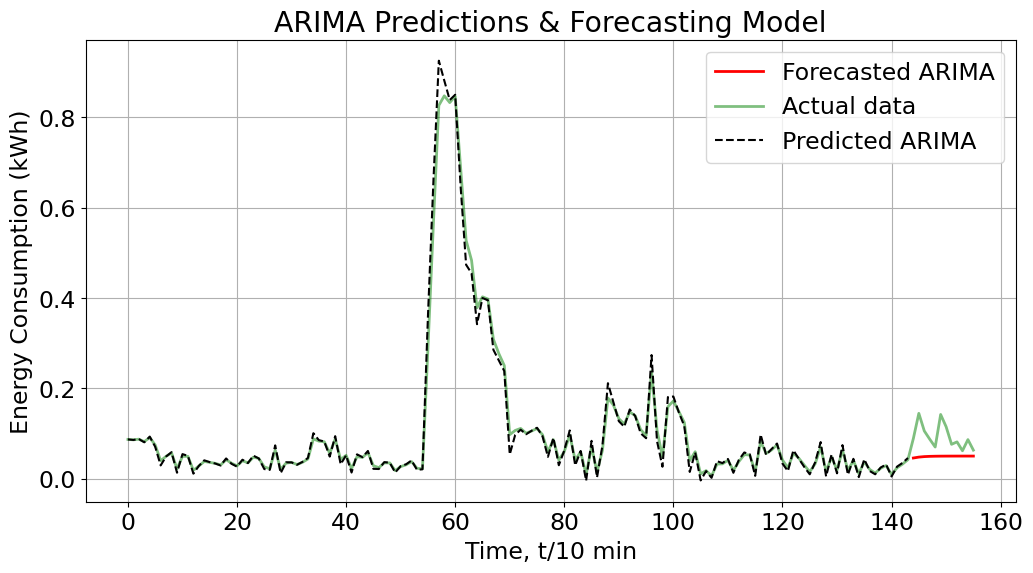

In [16]:
# Plotting All Results
rc('font', **{'size' : 17})
plt.figure(figsize=(12, 6))

plt.plot(list(range(total_time_len_day,total_time_len_day + length_of_predict)), forecast, 'r', label='Forecasted ARIMA', linewidth=2)
plt.plot(list(range(total_time_len_day + length_of_predict)), actual, 'g', label='Actual data', alpha=0.5, linewidth=2)
plt.plot(range(len(datainf[:total_time_len_day])), predict, 'black', label='Predicted ARIMA', linestyle='--')
plt.title('ARIMA Predictions & Forecasting Model')
plt.xlabel('Time, t/10 min')
plt.ylabel('Energy Consumption (kWh)')
plt.legend()
plt.grid(True)
#plt.savefig('sc1_arima.jpg')
plt.show()

- #### SVR plots

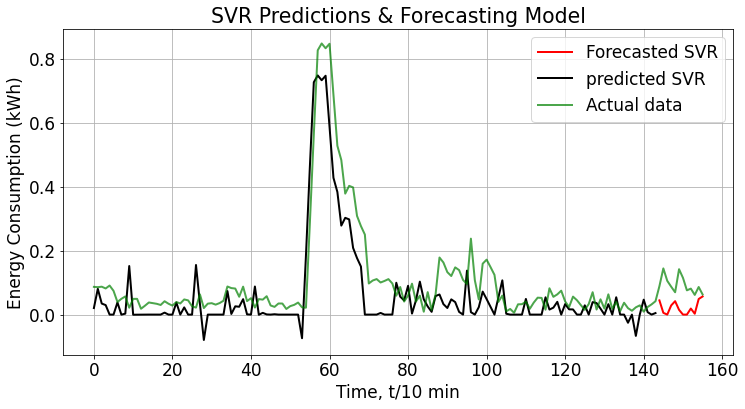

In [19]:
# Plotting
rc('font', **{'size' : 17})
plt.figure(figsize=(12, 6))

plt.plot(list(range(total_time_len_day, total_time_len_day + length_of_predict)), resout, 'r', label='Forecasted SVR', linewidth=2)
plt.plot(list(range(total_time_len_day)), past_predictions, 'black', label='Predicted SVR', linewidth=2)
plt.plot(list(range(total_time_len_day + length_of_predict)), actual, 'g', label='Actual data', alpha=0.7, linewidth=2)
plt.xlabel('Time, t/10 min')
plt.ylabel('Energy Consumption (kWh)')
plt.title('SVR Predictions & Forecasting Model')
plt.legend()
plt.grid(True)
#plt.savefig('sc1_svr.jpg')
plt.show()

- #### ANN Model Plots

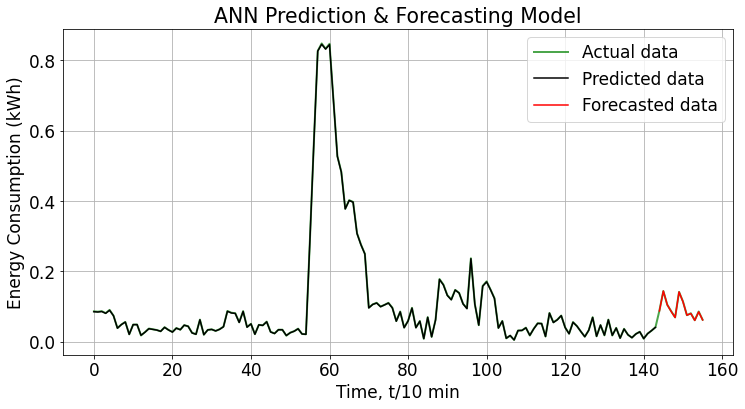

In [20]:
# Plotting Trained, Prediction & Forecast
rc('font', **{'size' : 17})
plt.figure(figsize=(12, 6))
actual = test_data[:total_time_len_day + length_of_predict]  # actual data input
plt.plot(list(range(total_time_len_day + length_of_predict)), actual, 'g', label='Actual data', alpha=0.7, linewidth=2)
plt.plot(range(0, total_time_len_day), pred[:total_time_len_day], 'black', linestyle='-', label='Predicted data')
plt.plot(range(total_time_len_day, total_time_len_day+length_of_predict), pred[total_time_len_day:total_time_len_day+length_of_predict], 'r', label='Forecasted data')
plt.xlabel('Time, t/10 min')
plt.ylabel('Energy Consumption (kWh)')
plt.title('ANN Prediction & Forecasting Model')
plt.legend()
plt.grid(True)
#plt.savefig('sc1_ann.jpg')
plt.show()

- #### Comparasion of prediction & forecasting of ARIMA, ANN & SVR Models   ####

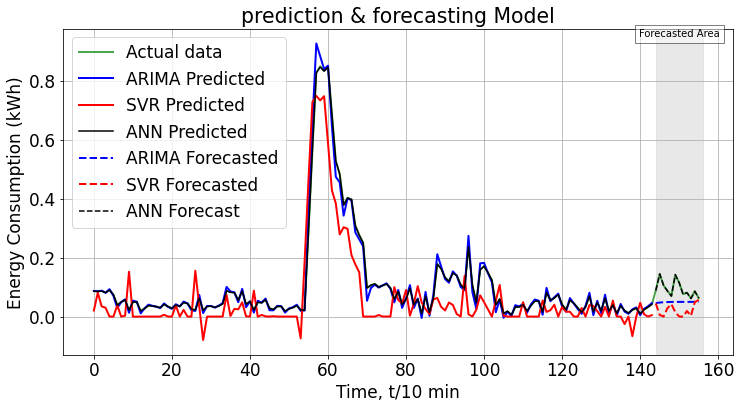

In [21]:
# Plotting All Results
# Plotting All Results predictions
rc('font', **{'size' : 17})
plt.figure(figsize=(12, 6))
plt.plot(list(range(total_time_len_day + length_of_predict)), actual, 'g', label='Actual data', alpha=0.7, linewidth=2)

# prediction plots
plt.plot(range(len(datainf[:total_time_len_day])), predict, 'blue', label='ARIMA Predicted', linewidth=2)
plt.plot(range(len(datainf[:total_time_len_day])), past_predictions, 'r', label='SVR Predicted', linewidth=2)
plt.plot(range(len(datainf[:total_time_len_day])), pred[:total_time_len_day], 'black', linestyle='-', label='ANN Predicted')

#forecasting plots
plt.plot(list(range(total_time_len_day,total_time_len_day + length_of_predict)), forecast, 'blue', linestyle='--', label='ARIMA Forecasted', linewidth=2)
plt.plot(list(range(total_time_len_day, total_time_len_day + length_of_predict)), resout, 'r', linestyle='--', label='SVR Forecasted', linewidth=2)
plt.plot(range(total_time_len_day, total_time_len_day+length_of_predict), pred[total_time_len_day:total_time_len_day+length_of_predict], 'black', linestyle='--', label='ANN Forecast')
plt.axvspan(total_time_len_day, total_time_len_day + length_of_predict, color='lightgray', alpha=0.5)
x_position = total_time_len_day + (length_of_predict / 2)  
y_position = plt.ylim()[1] 
plt.text(x_position, y_position, 'Forecasted Area', ha='center', va='top', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
plt.title('prediction & forecasting Model')
plt.xlabel('Time, t/10 min')
plt.ylabel('Energy Consumption (kWh)')
plt.legend()
plt.grid(True)
#plt.savefig('sc1_pf.jpg')
plt.show()



In [6]:
!pip freeze > requirements.txt

In [7]:
!pip list

Package                       Version
----------------------------- ---------------
absl-py                       2.1.0
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.5
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-anon-usage           0.4.2
anaconda-catalogs             0.2.0
anaconda-client               1.12.1
anaconda-cloud-auth           0.1.3
anaconda-navigator            2.5.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs     